In [2]:
from tensorflow.keras.layers import Dense, Input, Lambda, Flatten 
from tensorflow.keras.models import Model 
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.applications.inception_v3 import preprocess_input 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential
import numpy as np 
import glob as glob 


In [3]:
IMGAE_SIZE = [224, 224]
train_path = '../input/cotton-disease-dataset/Cotton Disease/train'
valid_path = '../input/cotton-disease-dataset/Cotton Disease/train'

In [4]:
inception = InceptionV3(input_shape=IMGAE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
for layer in inception.layers:
  layer.trainble = False

In [8]:
num_classes = 4

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(num_classes, activation='softmax')(x)

# Create a model object 
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam', 
    metrics=['accuracy']
)

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [18]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 61s 839ms/step - loss: 1.8678 - accuracy: 0.6904 - val_loss: 54.8512 - val_accuracy: 0.2925
Epoch 2/20
61/61 [==============================] - 36s 596ms/step - loss: 0.3390 - accuracy: 0.9122 - val_loss: 13347.0625 - val_accuracy: 0.2830
Epoch 3/20
61/61 [==============================] - 37s 601ms/step - loss: 1.3833 - accuracy: 0.7687 - val_loss: 723289.1250 - val_accuracy: 0.2358
Epoch 4/20
61/61 [==============================] - 37s 614ms/step - loss: 0.4243 - accuracy: 0.8827 - val_loss: 7033.9692 - val_accuracy: 0.2547
Epoch 5/20
61/61 [==============================] - 37s 600ms/step - loss: 0.4192 - accuracy: 0.9371 - val_loss: 7.6143 - val_accuracy: 0.7925
Epoch 6/20
61/61 [==============================] - 37s 602ms/step - loss: 0.1277 - accuracy: 0.9582 - val_loss: 0.3222 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 37s 608ms/step - loss: 0.2465 - accuracy: 0.9348 - val_loss: 0.2367 - val_acc

In [19]:
import matplotlib.pyplot as plt 

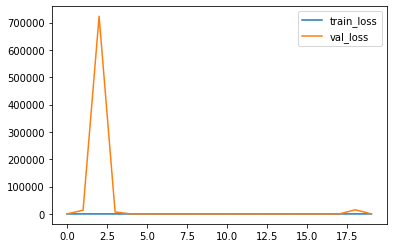

<Figure size 432x288 with 0 Axes>

In [20]:
## plot the loss 
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_resnet50')

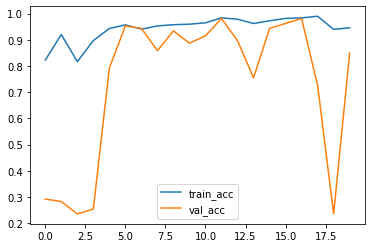

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_resnet50')

In [22]:
model.save('../input/cotton-disease-dataset\model.h5')